## Индивидуальный проект
В данной работе я использовал Датасет  - https://www.kaggle.com/hamzaben/employee-churn-model-w-strategic-retention-plan который, был получен от IBM  IBM HR Analytics Employee Attrition & Performance о Производительности и выбытии персонала. 

Структура проекта:

* Постановка проблемы
* Импорт данных, разведочный анализ данных
* Предварительная оценка возможных фич
* Подготовка пайплайна данных, инжиниринг фич
* Подготовка и обучение модели
* Вывод

## Часть 1. Постановка проблемы

Стоимость привлечения персонала с каждым годом растет и на рынке труда уже существует «Войны за таланты» связанные с дефицитом высококвалифицированных кадров. 

Удержание текущего персонала и снижения уровня текучести – напрямую влияет на конкурентоспособность организации.
Выявление факторов, влияющих на текучесть персонала может помочь компании разработать инструменты для удержания персонала.


In [1301]:
# Импортируем первую библиотеку для работы с данными Pandas
import pandas as pd
import numpy as np
import os
pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [1302]:
os.getcwd()

'C:\\Users\\Kirillwst\\HR-аналитика\\1_1'

In [1303]:
#SV-файл с данными (CSV-файл должен лежать рядом с исполняемым блокнотом)
df_hr = pd.read_csv('DB_FE.csv')

In [1304]:
# Частично отрисуем этот датасет на экран
pd.options.display.max_columns = 999
df_hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [1305]:
# Проверим датасет на наличие пустых значений при помощи метода .info()

df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Выше представленные данные говорят о том, что в нашем ДС содержится информация о 1470  сотрудниках, часть которые еще работает в компании и часть, которая уже выбыла. 

Все имеющиеся показатели (колонки), собранные в ДС представлены выше.

Часть значений у нас имеет текстовый формат, а это значит, что пришло время конвертировать их в числовые значения!
Какие значения мы будем конвертировать: 

- Attrition            
- OverTime                  

In [1306]:
df_hr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000
mean,36.924,802.486,9.193,2.913,1.000,1024.865,2.722,65.891,2.730,2.064,2.729,6502.931,14313.103,2.693,15.210,3.154,2.712,80.000,0.794,11.280,2.799,2.761,7.008,4.229,2.188,4.123
std,9.135,403.509,8.107,1.024,0.000,602.024,1.093,20.329,0.712,1.107,1.103,4707.957,7117.786,2.498,3.660,0.361,1.081,0.000,0.852,7.781,1.289,0.706,6.127,3.623,3.222,3.568
min,18.000,102.000,1.000,1.000,1.000,1.000,1.000,30.000,1.000,1.000,1.000,1009.000,2094.000,0.000,11.000,3.000,1.000,80.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000
25%,30.000,465.000,2.000,2.000,1.000,491.250,2.000,48.000,2.000,1.000,2.000,2911.000,8047.000,1.000,12.000,3.000,2.000,80.000,0.000,6.000,2.000,2.000,3.000,2.000,0.000,2.000
50%,36.000,802.000,7.000,3.000,1.000,1020.500,3.000,66.000,3.000,2.000,3.000,4919.000,14235.500,2.000,14.000,3.000,3.000,80.000,1.000,10.000,3.000,3.000,5.000,3.000,1.000,3.000
75%,43.000,1157.000,14.000,4.000,1.000,1555.750,4.000,83.750,3.000,3.000,4.000,8379.000,20461.500,4.000,18.000,3.000,4.000,80.000,1.000,15.000,3.000,3.000,9.000,7.000,3.000,7.000
max,60.000,1499.000,29.000,5.000,1.000,2068.000,4.000,100.000,4.000,5.000,4.000,19999.000,26999.000,9.000,25.000,4.000,4.000,80.000,3.000,40.000,6.000,4.000,40.000,18.000,15.000,17.000


При помощи метода describe мы  описали основные характеристики ДС, из которых мы можем уже сейчас обратить внимание на некоторые показатели, а именно: 
- Среднее пребывание на 1 роле – 3 года.  
- Средняя продолжительность работы в компании – 5 лет
- Средний месячный доход составляет 14 235, минимальный 2094, а максимальный 26 999. Достаточно интересная ситуация, когда медиана  от нижней плашки находится очень далеко, но вот от верхней – достаточно близко. 


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Attrition'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'EmployeeCount'}>,
        <AxesSubplot:title={'center':'EmployeeNumber'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>],
       [<AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>],
       [<AxesSubplot:title={'center':'OverTime'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>,
        <AxesSubplot:title={'center':'PerformanceRating'

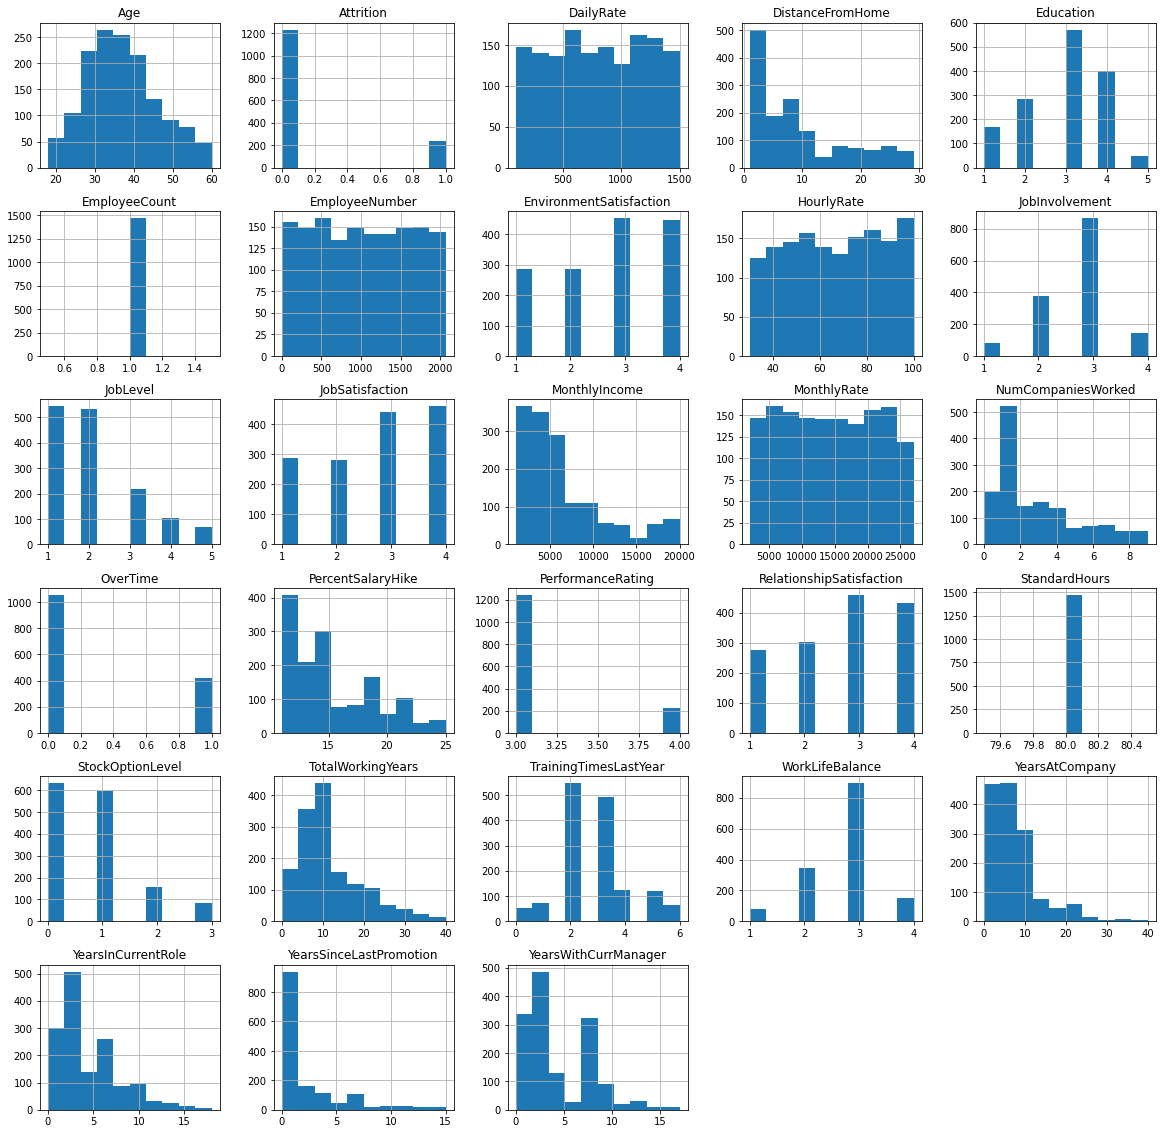

In [1579]:
df_hr.hist(figsize=(20,20))

In [1308]:
#сколько у нас в базе информации об сотрудниках, которые работают, и которые выбыли уже выбыли
df_hr['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

Таким образом мы видим, что на данный момент в компании работает 1233  сотрудника, а 237 выбыло.
- Классно было бы узнать, а какая доля персонала в компании работает с овертаймами сейчас? OverTime

In [1309]:
df_hr['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

Воу! В ДС действительно много сотрудников, которые работают \ работали с Овертаймами, и классно было бы узнать, долю сотрудников с овертаймами работающими сейчас и среди тех, кто уже покинул компанию.
Т.К разделить базы через Пайтон у меня не вышло, я разделил их руками, и сейчас просто импортирую

In [1548]:
df_hr_Yes = pd.read_csv('DB_FE_Yes.csv')
df_hr_No = pd.read_csv('DB_FE_No.csv')
df_hr_Yes.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
2,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,19,3,Male,50,2,1,Laboratory Technician,3,Single,2028,12947,5,Y,Yes,14,3,2,80,0,6,4,3,4,2,0,3
3,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,27,3,Male,82,2,1,Sales Representative,1,Single,3407,6986,7,Y,No,23,4,2,80,0,10,4,3,5,3,0,3
4,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,1,31,2,Male,83,3,1,Research Scientist,1,Single,2960,17102,2,Y,No,11,3,3,80,0,8,2,3,4,2,1,3


In [1549]:
# А теперь узнаем долю сотрудников с овертаймами среди выбывщих 
leave = df_hr_Yes['OverTime'].value_counts() / df_hr_Yes['EmployeeNumber'].nunique()

print(leave)

Yes   0.536
No    0.464
Name: OverTime, dtype: float64


In [1550]:
# А теперь узнаем долю сотрудников с овертаймами среди работаюх 
worknow = df_hr_No['OverTime'].value_counts() / df_hr_No['EmployeeNumber'].nunique()
print(worknow)

No    0.766
Yes   0.234
Name: OverTime, dtype: float64


Как мы можем увидеть из представленных данных, на данный момент в компании работает 23,4 % сотрудников с овертаймами, что достаточно много. Но более интересная информацию  у нас есть по выбывшим сотрудникам, ведь 53,6% из них работали с овертаймами.

## Часть 3. Предварительная оценка возможных фич

- Гипотеза 1: Выбытие персонала напрямую связано с его овертаймами
- Гипотеза 2: Овертаймы связаны с уровнем позици и уровнем дохода

Прежде всего попробуем посмотреть на нашу ДС и узнать, а какие корреляции в ней есть на данный момент? 

Но, мы уже знаем, что некоторые значения имеют текстовый формат, что не позволит нам выявить их корреляции с другими значениями. 

Для этого мы конвертируем их в цифровой формат. 

In [1552]:
from sklearn.preprocessing import LabelEncoder

In [1553]:
# creat1ing initial dataframe
temp_df = pd.DataFrame(df_hr[['Attrition']])
labelencoder = LabelEncoder()
df_hr[['Attrition']] = labelencoder.fit_transform(temp_df['Attrition'])

temp_df = pd.DataFrame(df_hr[['OverTime']])
labelencoder = LabelEncoder()
df_hr[['OverTime']] = labelencoder.fit_transform(temp_df['OverTime'])



In [1556]:
#Имеет еще один волшебный метод, который сразу считает матрицу корреляций по всему фрейму
df_hr.corr()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000,-0.159,0.011,-0.002,0.208,NaN,-0.010,0.010,0.024,0.030,0.510,-0.005,0.498,0.028,0.300,0.028,0.004,0.002,0.054,NaN,0.038,0.680,-0.020,-0.021,0.311,0.213,0.217,0.202
Attrition,-0.159,1.000,-0.057,0.078,-0.031,NaN,-0.011,-0.103,-0.007,-0.130,-0.169,-0.103,-0.160,0.015,0.043,0.246,-0.013,0.003,-0.046,NaN,-0.137,-0.171,-0.059,-0.064,-0.134,-0.161,-0.033,-0.156
DailyRate,0.011,-0.057,1.000,-0.005,-0.017,NaN,-0.051,0.018,0.023,0.046,0.003,0.031,0.008,-0.032,0.038,0.009,0.023,0.000,0.008,NaN,0.042,0.015,0.002,-0.038,-0.034,0.010,-0.033,-0.026
DistanceFromHome,-0.002,0.078,-0.005,1.000,0.021,NaN,0.033,-0.016,0.031,0.009,0.005,-0.004,-0.017,0.027,-0.029,0.026,0.040,0.027,0.007,NaN,0.045,0.005,-0.037,-0.027,0.010,0.019,0.010,0.014
Education,0.208,-0.031,-0.017,0.021,1.000,NaN,0.042,-0.027,0.017,0.042,0.102,-0.011,0.095,-0.026,0.126,-0.020,-0.011,-0.025,-0.009,NaN,0.018,0.148,-0.025,0.010,0.069,0.060,0.054,0.069
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010,-0.011,-0.051,0.033,0.042,NaN,1.000,0.018,0.035,-0.007,-0.019,-0.046,-0.015,0.013,-0.001,-0.024,-0.013,-0.020,-0.070,NaN,0.062,-0.014,0.024,0.010,-0.011,-0.008,-0.009,-0.009
EnvironmentSatisfaction,0.010,-0.103,0.018,-0.016,-0.027,NaN,0.018,1.000,-0.050,-0.008,0.001,-0.007,-0.006,0.038,0.013,0.070,-0.032,-0.030,0.008,NaN,0.003,-0.003,-0.019,0.028,0.001,0.018,0.016,-0.005
HourlyRate,0.024,-0.007,0.023,0.031,0.017,NaN,0.035,-0.050,1.000,0.043,-0.028,-0.071,-0.016,-0.015,0.022,-0.008,-0.009,-0.002,0.001,NaN,0.050,-0.002,-0.009,-0.005,-0.020,-0.024,-0.027,-0.020
JobInvolvement,0.030,-0.130,0.046,0.009,0.042,NaN,-0.007,-0.008,0.043,1.000,-0.013,-0.021,-0.015,-0.016,0.015,-0.004,-0.017,-0.029,0.034,NaN,0.022,-0.006,-0.015,-0.015,-0.021,0.009,-0.024,0.026


К сожалению, других значимых корреляций выявить не удается, попробуем провести анализ и построить модель, в которой мы сможем проверить наши гипотезы.

## Часть 4. Подготовка пайплайна данных, инжиниринг фич

In [1658]:
## Для проверки гипотезы 2

G1_X = df_hr[['Attrition']]
G1_Y = df_hr[['OverTime']]

In [1659]:
## Для проверки гипотезы 2

G2_X = df_hr[['JobLevel','MonthlyRate']]
G2_Y = df_hr[['OverTime']]

In [1660]:
G1_X

,Attrition
0,1
1,0
2,1
3,0
4,0
...,...
1465,0
1466,0
1467,0
1468,0


In [1661]:
G2_X 

,JobLevel,MonthlyRate
0,2,19479
1,2,24907
2,1,2396
3,1,23159
4,1,16632
...,...,...
1465,2,12290
1466,3,21457
1467,2,5174
1468,2,13243


In [1663]:
G1_Y

,OverTime
0,1
1,0
2,1
3,1
4,0
...,...
1465,0
1466,0
1467,1
1468,0


In [1667]:
G2_Y

,OverTime
0,1
1,0
2,1
3,1
4,0
...,...
1465,0
1466,0
1467,1
1468,0


In [1668]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

from matplotlib import pyplot

In [1669]:
G1_X_train, G1_X_test, G1_Y_train, G1_Y_test = train_test_split(G1_X, G1_Y, test_size = 0.2, random_state=82)

In [1670]:
G2_X_train, G2_X_test, G2_Y_train, G2_Y_test = train_test_split(G2_X, G2_Y, test_size = 0.2, random_state=82)

In [1671]:
# Посмотрим каков у нас оказался размер объектов в трейне и тесте
print(G1_X_train.shape)
print(G1_X_test.shape)
print(G1_Y_train.shape)
print(G1_Y_test.shape)

(1176, 1)
(294, 1)
(1176, 1)
(294, 1)


In [1672]:
# Посмотрим каков у нас оказался размер объектов в трейне и тесте
print(G2_X_train.shape)
print(G2_X_test.shape)
print(G2_Y_train.shape)
print(G2_Y_test.shape)

(1176, 2)
(294, 2)
(1176, 1)
(294, 1)


In [1673]:
G1_Y_test

,OverTime
472,0
1291,0
179,0
94,0
362,0
...,...
1029,0
661,0
890,0
406,1


## Часть 5. Подготовка и обучение модели

In [1674]:
lin_modelG1 = LinearRegression()
lin_modelG1.fit(G1_X_train, G1_Y_train)
lin_modelG2 = LinearRegression()
lin_modelG2.fit(G2_X_train, G2_Y_train)


LinearRegression()

In [1675]:
importanceG1 = lin_modelG1.coef_
importanceG2 = lin_modelG2.coef_

print(importanceG1)
print(importanceG2)


[[0.28038591]]
[[4.72518806e-03 1.92663036e-06]]


In [1676]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [1677]:
def model_access(lin_modelG1, G1_X_train, G1_X_test, G1_Y_train, G1_Y_test):

    # model evaluation for training set
    y_train_predict = lin_modelG1.predict(G1_X_train)
    rmse = (np.sqrt(mean_squared_error(G1_Y_train, y_train_predict)))
    r2 = r2_score(G1_Y_train, y_train_predict)

    
    print("\n")
    print("The model performance for training set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))
    print("--------------------------------------")
    print("\n")

    
    # model evaluation for testing set
    y_test_predict = lin_modelG1.predict(G1_X_test)
    rmse = (np.sqrt(mean_squared_error(G1_Y_test, y_test_predict)))
    r2 = r2_score(G1_Y_test, y_test_predict)

    print("The model performance for testing set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))

In [1678]:
model_access(lin_modelG1, G1_X_train, G1_X_test, G1_Y_train, G1_Y_test)



The model performance for training set
--------------------------------------
RMSE is 0.43991235774032006
R2 score is 0.051737875786028065
--------------------------------------


The model performance for testing set
--------------------------------------
RMSE is 0.42348883689559275
R2 score is 0.09452839798628354


In [1680]:
def model_access(lin_modelG2, G2_X_train, G2_X_test, G2_Y_train, G2_Y_test):

    # model evaluation for training set
    y_train_predict = lin_modelG2.predict(X_train)
    rmse = (np.sqrt(mean_squared_error(G2_Y_train, y_train_predict)))
    r2 = r2_score(G2_Y_train, y_train_predict)

    
    print("\n")
    print("The model performance for training set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))
    print("--------------------------------------")
    print("\n")

    
    # model evaluation for testing set
    y_test_predict = lin_modelG2.predict(G2_X_test)
    rmse = (np.sqrt(mean_squared_error(G2_Y_test, y_test_predict)))
    r2 = r2_score(G2_Y_test, y_test_predict)

    print("The model performance for testing set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))

In [1681]:
model_access(lin_modelG2, G2_X_train, G2_X_test, G2_Y_train, G2_Y_test)



The model performance for training set
--------------------------------------
RMSE is 0.4523220648379914
R2 score is -0.002516726662590285
--------------------------------------


The model performance for testing set
--------------------------------------
RMSE is 0.44598412871020365
R2 score is -0.004221945493874113


In [1683]:
G1_X_test

,Attrition
472,0
1291,1
179,0
94,0
362,0
...,...
1029,0
661,0
890,0
406,0


In [1684]:
G2_X_test

,JobLevel,MonthlyRate
472,2,15701
1291,2,4992
179,1,6319
94,2,24301
362,1,2851
...,...,...
1029,2,23099
661,2,23814
890,3,9659
406,3,19609


## Часть 6. Выводы

Мы провели исследование, тестируя несколько гипотез и пытаюсь научить модель предсказывать овертаймы на основе уровня позиции и месячным доходом, а также, попытались доказать, что выбытие сотрудников связано с этими самыми овертаймами. 

Чего нас удалось достигнуть? 
- Пытаясь найти закономерности, мы провели исследование сотрудников, которые выбыли из организации и обнаружили, что 53% из них работали с овертаймами, исходя из чего мы можем точно говорить о том, что этот показатель виляет на текучесть персонала. Научить модель предсказывать выбытие персонала, к сожалению, не удалось, но она также показала корреляцию этих показателей. 
- В исследовании причин овертаймом я сосредоточился на таких показателях как уровень позиции и месячный доход, при построении линейной модели была обнаружена высокая корреляция между этими признаками, но при попытке обучить модель – она не показала высоких результатов, я решил проверить, а почему оно так? – и обнаружил, что уровень позиции и месячный доход не коррелируют между собой, но при этом коррелируют с овертаймами. 
Почему так? – неизвестно. Казалось бы, должна быть минимальная логика в уровень позиции == уровень дохода, но у нас есть примеры в ДС, где Месячный доход сотрудника 1 ур составляет 6 319, сотрудника 2ур 24 301, а сотрудника 3ур 9 659.  
Мы можем предположить, что в каждом подразделение есть свои Joblvl, но и там наблюдаются такие же различия между 1 и 2 ур.
